In [41]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [42]:
from selenium import webdriver
import time

In [43]:
# 인프런 페이지 크롤링하는 함수
def inflearn_lecture_count(result):
    Inflearn_URL = "https://www.inflearn.com/search?s="
    wd = webdriver.Chrome() # 사용하는 동안 절대 끄면 안됨

    keywords = ['프론트엔드', '백엔드', '모바일', '데이터/AI', '보안', '게임', '클라우드'] # 크롤링할 검색 데이터

    for keyword in keywords:
        url = Inflearn_URL + keyword
        
        wd.get(url)
        time.sleep(1)

        try:
            html = wd.page_source
            time.sleep(1)
            soup = BeautifulSoup(html, 'html.parser')

            all_spans = soup.find_all('span', class_='mantine-1aryii5') # 강의수와 로드맵수를 가르키는 'mantine-1aryii5'인 span 태그를 찾아서 저장

            # 강의 개수
            lecture_count = int(all_spans[0].text) # 맨처음에는 tag 형태여서 문자열 형태로 바꾼 후 int 형으로 바꿈

            # 로드맵 개수
            roadmap_count = int(all_spans[1].text) # 맨처음에는 tag 형태여서 문자열 형태로 바꾼 후 int 형으로 바꿈

            print(f"{keyword}: 강의 {lecture_count}개, 로드맵 {roadmap_count}개")

            result.append([keyword, lecture_count, roadmap_count])
        
        except:
            countinue
    return

In [44]:
# 강의수 시각화 함수
def visualize_lecture(df):
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] = False

    plt.figure(figsize=(15,5))

    bars = plt.bar(df['키워드'], df['강의수'], color='skyblue')

    plt.xlabel('분야')
    plt.ylabel('강의 수')
    plt.title('분야별 강의 수')

    plt.xticks(rotation=45)
    plt.grid(axis='y')
    
    plt.show()

In [45]:
# 로드맵 시각화 함수
def visualize_roadmap(df):
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] = False

    plt.figure(figsize=(15,5))

    bars = plt.bar(df['키워드'], df['로드맵수'], color='skyblue')

    plt.xlabel('분야')
    plt.ylabel('학습 로드맵 수')
    plt.title('분야별 학습 로드맵 수')

    plt.xticks(rotation=45)
    plt.grid(axis='y')
    
    plt.show()

In [46]:
def main():
    result = []
    print('Inflearn crawling >>>>>>>>>>>>>>>>')

    inflearn_lecture_count(result)

    inflearn_df = pd.DataFrame(result, columns=('키워드', '강의수', '로드맵수')) # 리스트에 있던 데이터를 데이터프레임으로 변환

    print('CSV 파일 저장 중 >>>>>>>>>>>>')

    inflearn_df[['키워드', '강의수']].to_csv('C:/Users/wjdah/vscode-workspace/CareerRoute/assets/inflearn/inflearn_lecture.csv', encoding='utf-8-sig', mode='w', index='False')
    inflearn_df[['키워드', '로드맵수']].to_csv('C:/Users/wjdah/vscode-workspace/CareerRoute/assets/inflearn/inflearn_roadmap.csv', encoding='utf-8-sig', mode='w', index='False')

    print('CSV 파일 저장 완료 >>>>>>>>>>>>')

    print('그래프 생성 >>>>>>>>>>>>>>>>>')

    visualize_lecture(inflearn_df)
    visualize_roadmap(inflearn_df)

    print("그래프 생성 완료 >>>>>>>>>>>>>>")

Inflearn crawling >>>>>>>>>>>>>>>>
프론트엔드: 강의 576개, 로드맵 117개
백엔드: 강의 913개, 로드맵 223개
모바일: 강의 777개, 로드맵 39개
데이터/AI: 강의 703개, 로드맵 82개
보안: 강의 727개, 로드맵 53개
게임: 강의 1187개, 로드맵 57개
클라우드: 강의 599개, 로드맵 71개
CSV 파일 저장 중 >>>>>>>>>>>>
CSV 파일 저장 완료 >>>>>>>>>>>>
그래프 생성 >>>>>>>>>>>>>>>>>


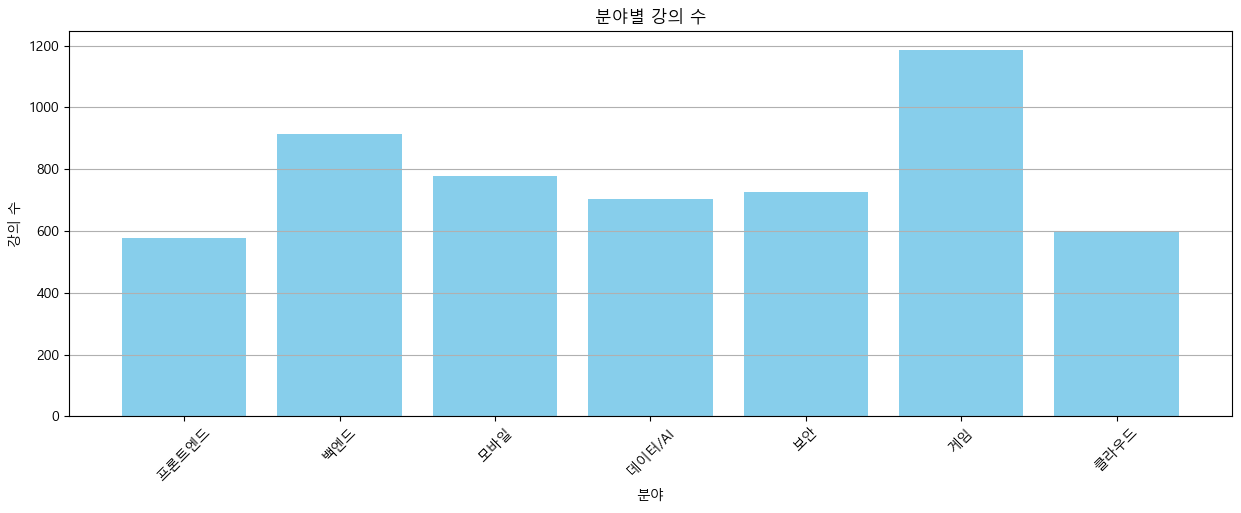

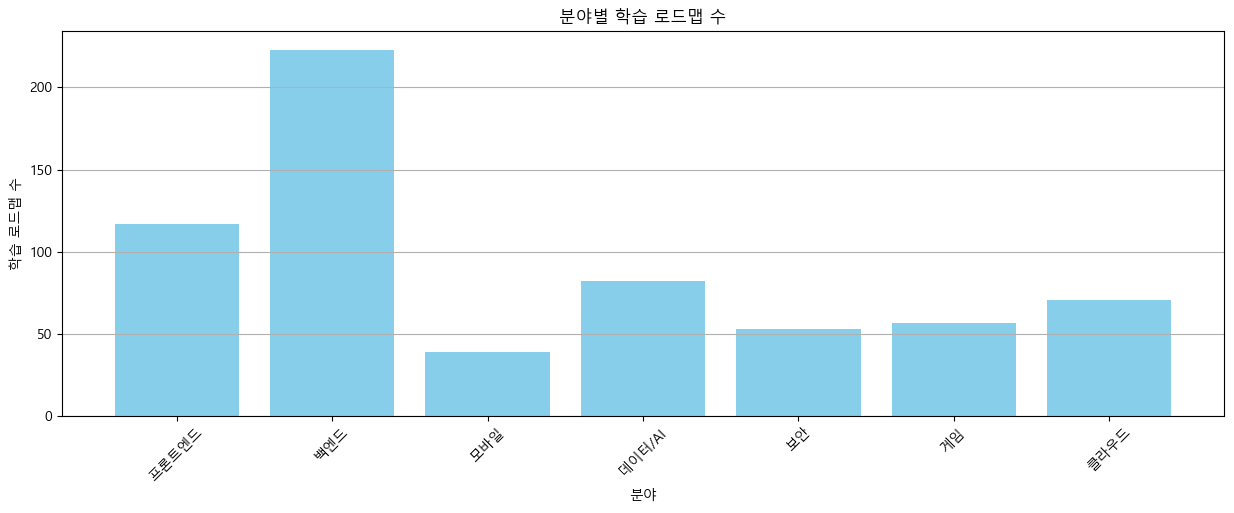

그래프 생성 완료 >>>>>>>>>>>>>>


In [47]:
if __name__ == '__main__':
    main()